# A five minute intro to Thermobar

## 1 - Introduction 

Thermobar is a Python thermobarometry tool. It implements many thermometer and barometer calibrations for single phase (e.g., cpx oer amph) and melt-crystal equilibria (e.g., cpx-liq etc.) 

We recomending importing 3 essential python packages, pandas which allows data to be treated a bit like an excel spreadsheet (with column headings), numpy which does math operations, and matplotlib which does plotting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2 - Importing Thermobar
Now we import the thermobarometry tool itself. this is imported as pt, so any time you want to call a functoin, you do pt.function_name

In [2]:
import sys
sys.path.append("../") # This allows you to put the python file in the folder above. So you can have lots of sub folders
import Thermobar as pt

## 3 - Load data from an Excel file
- Excel file is formatted with oxide names, followed by the phase (e.g., SiO2_Liq for the SiO2 content of the liquid). 
- In this case, the r after the bracket in the import excel function dictates that this is a relative path, so is looking in the folder "Cpx_Cpx_Liq_Thermobarometry"
- The import_excel function return a dictionary called "out", which in this case is a collection of formatted dataframes, with one for each phase. 
- We can access these dictionaries using their "keys" within square brackets, 'Liqs' and' Cpxs', and thus extract 2 dataframes, which we call Liqs and Cpxs
- The order of headings doesn't matter. 
- You can also have any other columns, e.g., estimate of pressure from any other proxy (melt inclusions, geophysics), and anything else you might want to plot (e.g., latitude, longitude)

In [3]:
out=pt.import_excel(r'Cpx_Cpx_Liq_Thermobarometry/Cpx_Liq_Example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

The <em>import_Excel</em> method loads the 'Cpx_Liq_Example.xlsx' and examines it looking at melt and crystal phases returning a dictionary, out in our case. 

The following are the phase identification names you should use when formatting an excel spreadsheet

Phase identification:
    <ul>
    <li>\_Liq: Liquid (the melt)</li>
    <li>\_Ol: olivine</li>
    <li>\_Cpx: clinopyroxene</li>
    <li>\_Plag: plagioclase</li>
    <li>\_Kspar: kfeldspar</li>
    <li>\_Opx: ortopyroxene</li>
    <li>\_Amp: amphibole</li>
    <li>\_Sp: spinel</li>
    <ul>

## 4. Inspect data
- you should always inspect data to check it has read in correctly, and Thermobar has intepreted all the column headings how you wanted them.
-  Sometimes your column headings may have funny characters due to use of spaces, subscripts etc. in journal pdf tables. Check that all the columns you entered have numbers. If, say your SiO2_Liq heading had funny characters, this column will be filled with zeros when you inspect it.
- by default, if you don't have a Sample_ID_phase column, but just a Sample_ID column, the Sample_ID column in each dataframes will be replaced with the index (E.g., 0, 1, 2, 3). 
- The head function shows the first 5 columns. Too look at more columns, remove .head()

In [4]:
display(Liqs.head())
display(Cpxs.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.1,0.93,17.5,8.91,0.18,6.09,11.50,3.53,0.17,0,0.15,3.8,0.0,0.0,0.0,0.0,0
1,51.5,1.19,19.2,8.70,0.19,4.98,10.00,3.72,0.42,0,0.14,6.2,0.0,0.0,0.0,0.0,1
2,59.1,0.54,19.1,5.22,0.19,3.25,7.45,4.00,0.88,0,0.31,6.2,0.0,0.0,0.0,0.0,2
3,52.5,0.98,19.2,8.04,0.20,4.99,9.64,4.15,0.21,0,0.14,6.2,0.0,0.0,0.0,0.0,3
4,56.2,0.34,20.4,5.88,0.20,2.58,7.18,6.02,1.02,0,0.23,6.2,0.0,0.0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.5,0.50,3.70,5.18,0.09,15.8,22.8,0.24,0,0.66,0
1,50.3,0.73,4.12,5.83,0.00,15.0,22.7,0.24,0,0.28,1
2,47.3,1.75,7.85,6.51,0.14,13.1,22.5,0.25,0,0.22,2
3,51.1,0.63,4.41,5.66,0.13,15.6,22.6,0.23,0,0.27,3
4,51.0,0.56,4.14,7.33,0.20,14.4,22.4,0.31,0,0.09,4


## 5 - Getting help

The <em>help()</em> method provide you relevant informations:

In [5]:
help(pt.calculate_cpx_liq_temp)

Help on function calculate_cpx_liq_temp in module Thermobar.clinopyroxene_thermobarometry:

calculate_cpx_liq_temp(*, equationT, cpx_comps=None, liq_comps=None, meltmatch=None, P=None, eq_tests=False, H2O_Liq=None, Fe3Fet_Liq=None, sigma=1, KdErr=0.03)
     Clinopyroxene-Liquid thermometry, calculates temperature in Kelvin
     (and equilibrium tests as an option)
    
    Parameters
     -------
     cpx_comps: DataFrame
         Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
     liq_comps: DataFrame
         Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
     Or:
    
     meltmatch: DataFrame
         Combined dataframe of cpx-Liquid compositions
         Used for calculate_cpx_liq_press_temp_matching function.
    
     EquationT: str
         Choice of equation:
         Cpx-Liquid
         |  T_Put1996_eqT1  (P-indep, H2O-indep)
         |  T_Mas2013_eqTalk1  (P-indep, H2O-indep, alk adaption of T1)
         |  T_Brug2019  (P-indep, 

### You can also get help on specific equations to find out what inputs they use:

In [6]:
help(pt.T_Put2008_eq33)

Help on function T_Put2008_eq33 in module Thermobar.clinopyroxene_thermobarometry:

T_Put2008_eq33(P, *, H2O_Liq, Mg_Number_Liq_NoFe3, CaO_Liq_cat_frac, SiO2_Liq_cat_frac, TiO2_Liq_cat_frac, Na2O_Liq_cat_frac, K2O_Liq_cat_frac, EnFs, lnK_Jd_DiHd_liq_2003)
    Clinopyroxene-liquid  thermometer of Putirka (2008) Eq 33.
    
    |  SEE=+-°C



## 6 - Can perform calculations just for pressure if you know temperature
- For all functions, the form is calculate_phase1_phase2_press, or if its a single-phase barometer, calculate_phase1_only_press
- Specify dataframes of phase compositions after _comps=, and specify equationP. If the barometer requires a temperature, you can enter it as a single value, or as a column (see Liquid folder for more info)

In [7]:
# Here performing calculations at 1300 K
Press_eq30_1300K=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", T=1300)

## 7 - Similarly, for temperature at a known pressure
- Same as for press, but with the ending _temp instead, and equationT

In [8]:
# Here performing calculations at 5 kbar
Temp_eq33_5kbar=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Put2008_eq33", P=5)

## 8 - If you don't know either P or T
- You can iterate an equation for pressure with an equation for temp for the more realistic situation where you don't know either

In [9]:
PT_iter_30_31=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")
PT_iter_30_31

,P_kbar_calc,T_K_calc
0,2.530914,1352.408784
1,1.786845,1290.151507
2,1.171520,1255.933868
3,2.143416,1292.669093
4,2.763538,1243.469600


In the example above, <calculate_cpx_liq_press_temp iterates equation 30 from Putirka (2008) for P, and equation 33 from Putirka (2008) for temperature. The output is a panda's dataframe.

## 9 -  Can plot a very x-y diagram using matplotlib (loaded as plt)

Text(0, 0.5, 'T (K)')

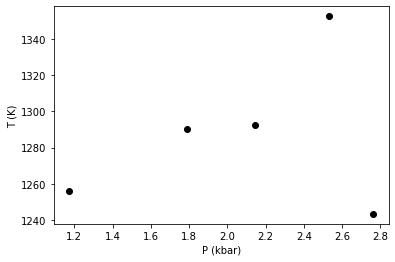

In [10]:
plt.plot(PT_iter_30_31['P_kbar_calc'], PT_iter_30_31['T_K_calc'], 'ok')
plt.xlabel('P (kbar)')
plt.ylabel('T (K)')

## Example of warnings for incorrect inputs
- here, the phase identifiers are lower case in the input spreadsheet, this warns uses they havent been recognised

In [11]:
out2=pt.import_excel(r'Cpx_Cpx_Liq_Thermobarometry/Cpx_Liq_Example.xlsx', sheet_name="Sheet2")
Cpxs2=out2['Cpxs']

..\Thermobar\import_export.py:246: UserWarning: You've got a column heading with a lower case _cpx, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Cpx)
  w.warn("You've got a column heading with a lower case _cpx, this is okay if this column is for your"
..\Thermobar\import_export.py:274: UserWarning: You've got a column heading with a lower case _liq, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Liq)
  w.warn("You've got a column heading with a lower case _liq, this is okay if this column is for your"


By inspecting the dataframes extracted from this input, you can see that Thermobar couldnt find any relevant column headings as all the columns except the sample ID are 0. 
This is why we recomend users always inspect dataframes before proceeding to calculations!

In [13]:
display(Cpxs2.head())

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
